In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import ijson
import seaborn as sns
from data_processing_utils import *

In [2]:
input_filename = "6386d89efb3ff533c12df167__post10.json"
min_t = pd.to_datetime("2022-11-30 14:00:00.400000095")
HOURS_TO_LOAD = 1
DATA_DIR = "data/"
DIRECTION = "west"
FILE_NAME = f"{DIRECTION}bound_trajectories_{HOURS_TO_LOAD}_hr_df.csv"
FILE_PATH = DATA_DIR + FILE_NAME

I24_DATA_DIR = "i24-data/11-30-2022/"

In [3]:
file_path = os.path.join(I24_DATA_DIR, input_filename)
westbound_trajectories_1_hr_df = load_trajectories(
    file_path, pd.Timedelta(hours=HOURS_TO_LOAD), min_t, direction_str="west"
)
westbound_trajectories_1_hr_df.to_csv(FILE_PATH)

Loaded 150088 westbound trajectories.
['trajectory_id', 'timestamp', 'x_position', 'y_position']
          trajectory_id                     timestamp     x_position  \
0                     0 2022-11-30 14:00:02.000000000  100651.484375   
1                     0 2022-11-30 14:00:02.040000200  100651.257812   
2                     0 2022-11-30 14:00:02.080000162  100651.015625   
3                     0 2022-11-30 14:00:02.119999886  100650.781250   
4                     0 2022-11-30 14:00:02.160000086  100650.539062   
...                 ...                           ...            ...   
56615693         150087 2022-11-30 15:00:02.220000029   97554.070312   
56615694         150087 2022-11-30 15:00:02.259999990   97553.281250   
56615695         150087 2022-11-30 15:00:02.300000191   97552.476562   
56615696         150087 2022-11-30 15:00:02.340000153   97551.679688   
56615697         150087 2022-11-30 15:00:02.380000114   97550.882812   

          y_position  
0           8.0

In [3]:
# load CSV
westbound_trajectories_1_hr_df = pd.read_csv(FILE_PATH)

In [4]:
westbound_trajectories_1_hr_df["timestamp"] = pd.to_datetime(
    westbound_trajectories_1_hr_df["timestamp"]
)

xmax 101066.805
x_min 94629.43
CSV file saved as data/10sec_400_m_flow_speed_1hr.csv


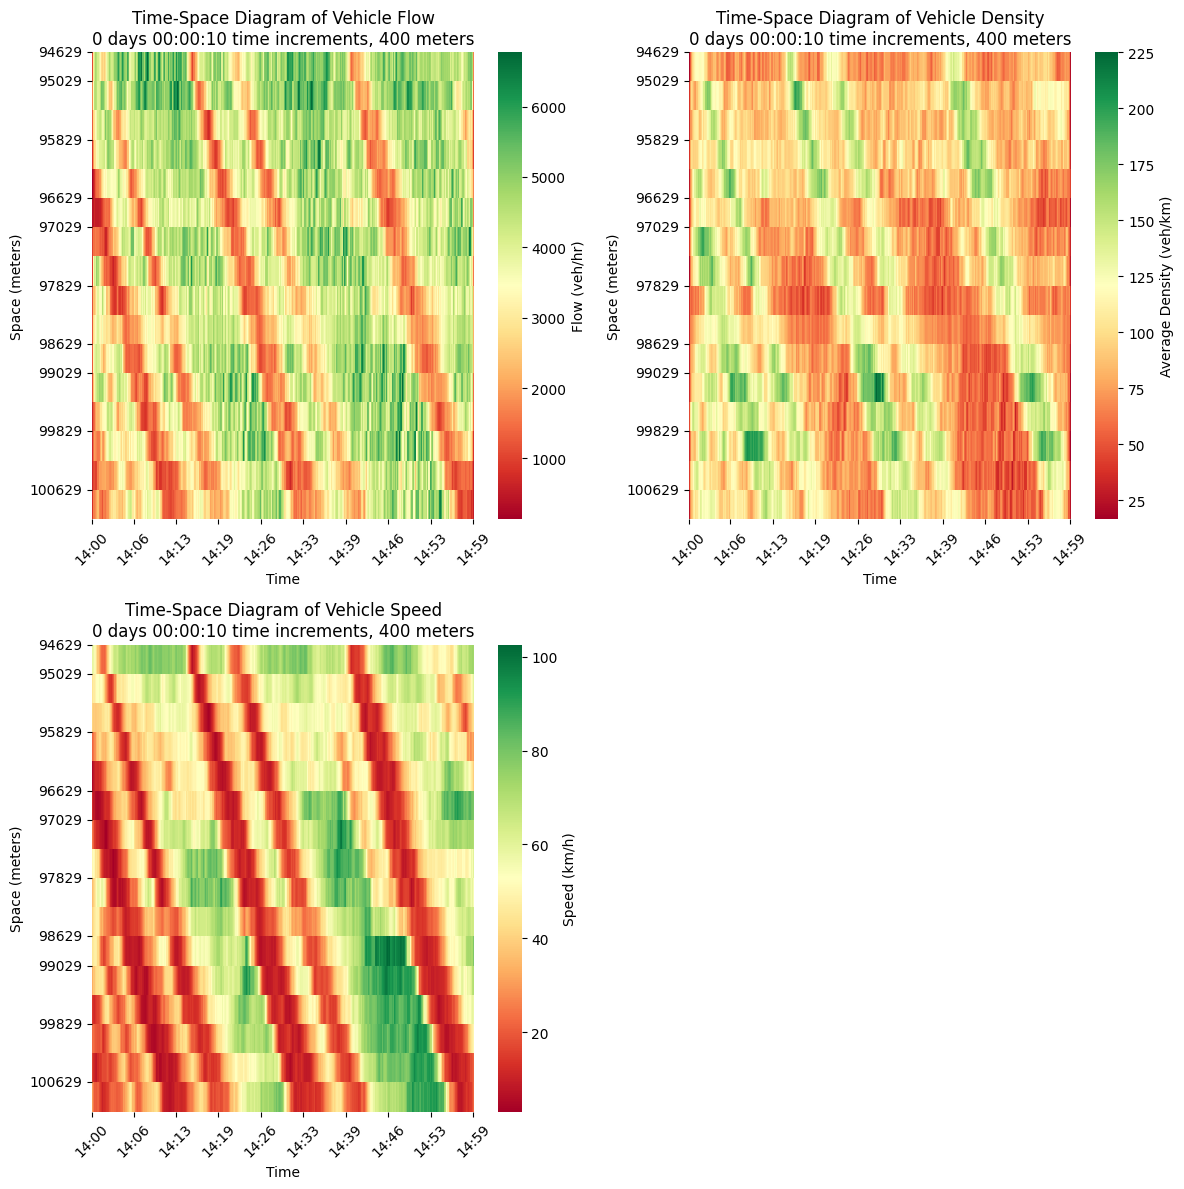

In [5]:
TIME_INT = 10  # seconds
DISTANCE = 400  # meters
HOURS = 1

flow, density = get_flow_density_matrix(
    westbound_trajectories_1_hr_df,
    time_interval=pd.Timedelta(seconds=TIME_INT),
    space_interval=DISTANCE,
    output_filename=f"{TIME_INT}sec_{DISTANCE}_m_flow_speed_{HOURS}hr.csv",
)
t_min, t_max = (
    westbound_trajectories_1_hr_df["timestamp"].min(),
    westbound_trajectories_1_hr_df["timestamp"].max(),
)
x_min, x_max = (
    westbound_trajectories_1_hr_df["x_position"].min(),
    westbound_trajectories_1_hr_df["x_position"].max(),
)


# Accounting for cameras that were down/damaged/obscured + flipping for direction
flow = flow[:, :-1]
flow = np.flip(flow, axis=1)
flow[:, 6] = (flow[:, 5] + flow[:, 7]) / 2
# flow[:, 10] = (flow[:, 9] + flow[:, 11]) / 2
density = density[:, :-1]
density = np.flip(density, axis=1)
density[:, 6] = (density[:, 5] + density[:, 7]) / 2
# density[:, 10] = (density[:, 9] + density[:, 11]) / 2
velocity_arr = flow / density


np.save(f"data/flow_{TIME_INT}sec_{DISTANCE}m_{HOURS}hr.npy", flow)
np.save(f"data/density_{TIME_INT}sec_{DISTANCE}m_{HOURS}hr.npy", density)
np.save(f"data/velocity_{TIME_INT}sec_{DISTANCE}m_{HOURS}hr.npy", velocity_arr)

plot_matrices(
    np.flip(flow, axis=1),
    np.flip(density, axis=1),
    pd.Timedelta(seconds=TIME_INT),
    DISTANCE,
    t_min,
    t_max,
    x_min,
    x_max,
)